In [1]:
%reload_ext autotime
import pandas as pd
import plotly.io as pio
import plotly.express as px # Plotting
from tqdm import tqdm
tqdm.pandas()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
pio.renderers.default = 'notebook'
pd.options.plotting.backend = "plotly"
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 100)

def parse(number):
    try:
        return float(number)
    except ValueError:
        return None

time: 1.9 s (started: 2025-11-10 10:48:22 +13:00)


In [2]:
df = pd.read_excel("LLM_results.xlsx")
df = df[(df.timeLeft == "closed") & (df.goal > 0)]
df.sentiment = df.sentiment.astype(str).str.split(" ").str[0].astype(float)
df.truth = df.truth.astype(str).str.split(" ").str[0].astype(float)
df.urgency = df.urgency.astype(str).str.split(" ").str[0].astype(float)
df["Target_completion"] = df.amountRaised / df.goal * 100
df

,Index,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,_21,text,condition,ICD10,ICD,name,gender,age,age_group,ethnicity,urgency,sentiment,truth,notes,smiling,deservingness,attractiveness,use,region,narrative_clarity,narrative_quality,emotional_tone,image_type,face_visible,facial_expression,image_quality,progression,treatment,treatment_effectiveness,treatment_side_effects,site,stage,reason,narrative_clarity,emotional_tone,facial_expression,progression,treatment,treatment_effectiveness,treatment_side_effects,site,stage,reason,Target_completion
21,21,Need roughly $30.000 for unfunded cancer treatment (Abiraterone Acetate+Methylprednisolone),"Your support would mean the world, helping cover these costs so I can focus on cherishing every ...",https://static.givealittle.co.nz/assets/hero/e7f518e2-a54e-4fa7-9763-b37c00fedf16-320:False,https://givealittle.co.nz/cause/need-dollar30000-for-unfunded-cancer-treatment,265.0,35000.0,closed,Read more,https://givealittle.co.nz/cause/need-dollar30000-for-unfunded-cancer-treatment,20 Oct 2025,24 Oct 2025,0,Nationwide,10.0,In July 2024 I was diagnosed with Metastatic prostate cancer. Metastatic as it has spread extens...,My Cancer treatment (Abiraterone Acetate+Methylprednisolone) which isnt funded in New Zealand,"Created by, and paying to a verified bank account of,\r\nBruce Alpine",Page Moderated,NaN,NaN,NaN,Title: Need roughly $30.000 for unfunded cancer treatment (Abiraterone Acetate+Methylprednisolon...,Metastatic prostate cancer,C61,Chapter C00-D49 - Neoplasms,Unknown,Male,65,65+,Caucasian,95.0,65.0,90.0,The person is likely of Caucasian ethnicity based on appearance in the image. The campaign is fo...,0,90.0,70.0,medical expenses,Nationwide,90.0,85.0,desperate,portrait,1,serious,high,95,70,40,60,prostate,IV,The individual is seeking funds to cover the cost of unfunded cancer treatment (Abiraterone Acet...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.757143
87,87,Support Mum’s Urgent Heart Surgery,To raise funds for our mum’s open-heart surgery. Any contribution is deeply appreciated as we st...,https://static.givealittle.co.nz/assets/hero/d4a8d0e0-f9f9-4040-9f7a-b36301448e77-320:False,https://givealittle.co.nz/cause/help-save-our-mums-heart,8520.0,15000.0,closed,Read more,https://givealittle.co.nz/cause/help-save-our-mums-heart,25 Sep 2025,3 Oct 2025,0,Auckland,44.0,"On Monday, September 15th, our mum suffered a heart attack. Doctors discovered three major arter...",Procedure and hospital expenses,"Created by, and paying to a verified bank account of,\r\nCielo Tionko on behalf of My Mum's...",Page Moderated,NaN,NaN,NaN,Title: Support Mum’s Urgent Heart Surgery\nPitch: To raise funds for our mum’s open-heart surger...,Heart attack,I21,Chapter I00-I99 - Diseases of the circulatory system,Cielo Tionko's mum,Female,65,65+,Asian,95.0,70.0,90.0,"The text is clear and heartfelt, with a strong narrative about a heart attack and urgent surgery...",1,95.0,75.0,medical expenses,Auckland,90.0,85.0,desperate,portrait,1,smiling,high,85,0,0,0,NaN,NaN,To raise funds for urgent open-heart triple bypass surgery due to a heart attack with blocked ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.800000
90,90,Please Help Mum Drive Her Car,Please help mum to modify her car to a left foot accelerator.,https://static.givealittle.co.nz/assets/hero/fd316603-730e-4d7a-8d2a-b3630141de75-320:False,https://givealittle.co.nz/cause/please-help-mum-drive-her-car,3330.0,3500.0,closed,Read more,https://givealittle.co.nz/cause/please-help-mum-drive-her-car,24 Sep 2025,24 Oct 2025,0,"Taihape, Manawatu-Wanganui",67.0,"""3 and a half years ago, my mum had an emergency right, below the knee amputation to save her li...",All funds raised will be spent on having my car modified to a left foot accelerator.,"Created by, and paying to a verified bank account of,\r\nSally Margaret Chambers",Page Moderated,NaN,NaN,N

time: 7.43 s (started: 2025-11-10 10:48:24 +13:00)


In [3]:
df.gender.value_counts().head(20)

gender
Female                   2430
Male                     1779
Other/unknown             539
unknown                     5
indeterminate/unknown       1
Unknown                     1
Male, Female                1
Name: count, dtype: int64

time: 8.74 ms (started: 2025-11-10 10:48:31 +13:00)


In [4]:
print("\n".join(df[df.gender == "Male and Female"].uri.to_list()))


time: 3.74 ms (started: 2025-11-10 10:48:31 +13:00)


In [5]:
df.gender = df.gender.str.lower().where(df.gender.str.lower().isin(['male', 'female']), 'other')
df.gender.value_counts()

gender
female    2430
male      1779
other      547
Name: count, dtype: int64

time: 19.3 ms (started: 2025-11-10 10:48:31 +13:00)


In [6]:
df.ethnicity.value_counts().head(20)

ethnicity
Caucasian           2088
Pacific Islander     483
unknown              444
Pākehā               399
Māori                387
South Asian          220
Asian                146
Pacific               94
Filipino              82
White                 70
African               57
Unknown               55
Other/unknown         35
Hispanic              26
Samoan                24
Black                 14
Fijian                14
Middle Eastern        11
Indian                10
Latino                10
Name: count, dtype: int64

time: 10.6 ms (started: 2025-11-10 10:48:31 +13:00)


In [7]:
df.ethnicity = df.ethnicity.str.extract(r"(.+?)(?= \(|$)")
df.ethnicity.value_counts().head(20)

ethnicity
Caucasian           2088
Pacific Islander     483
unknown              444
Pākehā               399
Māori                387
South Asian          220
Asian                146
Pacific               94
Filipino              82
White                 70
African               57
Unknown               55
Other/unknown         35
Hispanic              26
Samoan                24
Black                 14
Fijian                14
Middle Eastern        11
Indian                10
Latino                10
Name: count, dtype: int64

time: 32.1 ms (started: 2025-11-10 10:48:31 +13:00)


In [8]:
df.attractiveness = df.attractiveness.apply(parse)
df[df.attractiveness >= 90]

,Index,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,_21,text,condition,ICD10,ICD,name,gender,age,age_group,ethnicity,urgency,sentiment,truth,notes,smiling,deservingness,attractiveness,use,region,narrative_clarity,narrative_quality,emotional_tone,image_type,face_visible,facial_expression,image_quality,progression,treatment,treatment_effectiveness,treatment_side_effects,site,stage,reason,narrative_clarity,emotional_tone,facial_expression,progression,treatment,treatment_effectiveness,treatment_side_effects,site,stage,reason,Target_completion
220,220,Life Saving Surgery For Esteban Our Mini Dachshund (IVDD),Fund raising to get Esteban the mini dachshund life saving surgery.,https://static.givealittle.co.nz/assets/hero/0f9946bb-6956-497d-a8e9-b34401554923-320:False,https://givealittle.co.nz/cause/life-saving-surgery-for-esteban-our-mini-dachshund,5485.00,5000.0,closed,Read more,https://givealittle.co.nz/cause/life-saving-surgery-for-esteban-our-mini-dachshund,25 Aug 2025,8 Sep 2025,0,"Dunedin, Otago",105.0,"Please Help Us Save Esteban’s Life\nEsteban has been diagnosed with Intervertebral Disc Disease,...",Surgery and aftercare costs for Esteban.,"Created by, and paying to a verified bank account of,\r\nSam Heath",Page Moderated,NaN,NaN,NaN,Title: Life Saving Surgery For Esteban Our Mini Dachshund (IVDD)\nPitch: Fund raising to get Est...,Intervertebral Disc Disease,M51.2,Chapter M00-M99 - Diseases of the musculoskeletal system and connective tissue,Esteban,other,5,0-14,unknown,95.0,65.0,90.0,"The image shows a dachshund, not a human, so all human attributes are inferred from the text. Th...",0,85.0,90.0,medical expenses,Otago,90.0,85.0,desperate,portrait,1,neutral,high,70,0,0,0,NaN,NaN,"Donated funds will be used to cover the cost of life-saving surgery, aftercare, and rehabilitati...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.700000
441,441,Tragic family circumstances,Tragic family circumstances,https://static.givealittle.co.nz/assets/hero/47874955-526a-40bd-9682-b31300cb2790-320:False,https://givealittle.co.nz/cause/tragic-family-circumstances,2190.00,5000.0,closed,Read more,https://givealittle.co.nz/cause/tragic-family-circumstances,7 Jul 2025,28 Jul 2025,0,Marlborough,39.0,"Five days ago Valley was 5 months old, today she is on life support in Canada waiting for her gr...","Return flights to Canada/NZ, food",Created by\r\nRa Davis \n\n\n\n\r\n Paying to a verified bank account of\r\nDebbie Huia,Page Moderated,1.0,Tragic family circumstances\n15 July 2025\nAs many of you are aware Debz moko passed away in her...,NaN,Title: Tragic family circumstances\nPitch: Tragic family circumstances\nDescription: Five days a...,Neonatal death,P96.9,Chapter P00-P96 - Certain conditions originating in the perinatal period,Valley,female,5,0-14,Māori,95.0,10.0,85.0,"The text mentions a tragic event involving a 5-month-old baby. The image shows a smiling baby, w...",1,90.0,95.0,"travel expenses, medical expenses",Marlborough,85.0,70.0,desperate,portrait,1,smiling,high,100,0,0,0,NaN,NaN,Funds are needed for Deb to travel to Canada to retrieve her deceased granddaughter's body and t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.800000
1085,1085,A Helmet for Amelia’s Bright Future,Helping baby Amelia get the orthotic helmet she needs — because every little head deserves a hea...,https://static.givealittle.co.nz/assets/hero/1767aff8-a54d-40d8-9566-b2c7017108a3-320:False,https://givealittle.co.nz/cause/a-helmet-for-amelias-bright-future,2501.00,4200.0,closed,Read more,https://givealittle.co.nz/cause/a-helmet-for-amelias-bright-future,22 Apr 2025,13 May 2025,0,"Hamilton, Waikato",75.0,"My bright baby girl, Amelia, has been diagnosed with cranial deformities. The recommended treatm...","Orthotic cranial helmet and therapy for Amelia at Orthotic House, NZ (https://www.orthotichouse....","Created by, and paying to a verified ban

time: 78.5 ms (started: 2025-11-10 10:48:31 +13:00)


In [9]:
df.ethnicity = df.ethnicity.replace({
    "European/Caucasian": "Caucasian",
    "European/White": "Caucasian",
    "European/White": "Caucasian",
    "European/New Zealand": "Caucasian",
    "European/New Zealander": "Caucasian",
    "European/New Zealand European": "Caucasian",
    "Māori/Pacific Islander": "Māori",
    "Asian/Pacific Islander": "Pacific Islander",
    "Maori": "Māori"
})
top_20 = df.ethnicity.value_counts().head(20)
display(top_20)
df.ethnicity = df.ethnicity.where(df.ethnicity.isin(top_20.index), "other")

ethnicity
Caucasian           2088
Pacific Islander     483
unknown              444
Pākehā               399
Māori                390
South Asian          220
Asian                146
Pacific               94
Filipino              82
White                 70
African               57
Unknown               55
Other/unknown         35
Hispanic              26
Samoan                24
Black                 14
Fijian                14
Middle Eastern        11
Latino                10
Indian                10
Name: count, dtype: int64

time: 16.1 ms (started: 2025-11-10 10:48:32 +13:00)


In [10]:
df.condition.str.lower().value_counts().head(20)

condition
cancer                    274
breast cancer             216
gender dysphoria          122
bowel cancer               85
stroke                     79
lung cancer                72
multiple sclerosis         72
melanoma                   55
obesity                    46
endometriosis              44
infertility                43
cerebral palsy             39
ovarian cancer             38
kidney failure             37
type 1 diabetes            36
heart attack               33
traumatic brain injury     32
mental health              31
mental health issues       29
spinal cord injury         27
Name: count, dtype: int64

time: 13.3 ms (started: 2025-11-10 10:48:32 +13:00)


In [11]:
df.sentiment.value_counts()

sentiment
65.0    1008
60.0     817
70.0     651
75.0     567
30.0     548
85.0     230
40.0     212
45.0     147
80.0     143
35.0     124
20.0      86
50.0      54
25.0      48
10.0      36
55.0      33
90.0      21
15.0      16
95.0       7
0.0        7
88.0       1
Name: count, dtype: int64

time: 9.38 ms (started: 2025-11-10 10:48:32 +13:00)


In [12]:
df.use.str.lower().value_counts().head(20)

use
medical expenses                                                         1538
medical expenses, travel expenses                                         890
medical expenses, travel expenses, lost wages                             764
medical expenses, lost wages                                              364
medical expenses, experimental therapies                                  320
travel expenses                                                           158
medical expenses, experimental therapies, travel expenses, lost wages     157
travel expenses, medical expenses                                          93
medical expenses, experimental therapies, travel expenses                  59
travel expenses, lost wages                                                37
medical expenses, experimental therapies, lost wages                       27
medical expenses, lost wages, travel expenses                              19
medical expenses, funeral expenses                          

time: 11.3 ms (started: 2025-11-10 10:48:32 +13:00)


In [13]:
df.age_group = df.age_group.str.extract(r"(.+?)(?= \(|$)")
df.age_group = df.age_group.str.lower().where(df.age_group.str.lower().isin(['0-14', '15-64', '65+']), 'indeterminate/unknown')
df.age_group.value_counts()

age_group
15-64                    2888
65+                       790
0-14                      668
indeterminate/unknown     410
Name: count, dtype: int64

time: 28.9 ms (started: 2025-11-10 10:48:32 +13:00)


In [14]:
df.gender.value_counts()

gender
female    2430
male      1779
other      547
Name: count, dtype: int64

time: 4.1 ms (started: 2025-11-10 10:48:32 +13:00)


In [15]:
df["Charity"] = df.whos_involved.str.contains(r"(Charity)", regex=False)

time: 4.79 ms (started: 2025-11-10 10:48:32 +13:00)


In [16]:
df.to_excel("LLM_results_cleaned.xlsx", index=False)

time: 6.21 s (started: 2025-11-10 10:48:32 +13:00)


In [17]:
df["met_target"] = (df.amountRaised >= df.goal).astype(int)

time: 1.78 ms (started: 2025-11-10 10:48:38 +13:00)


In [18]:
df["parsed_age"] = df.age.apply(parse)
df.parsed_age.value_counts().head(20)

parsed_age
35.0    605
45.0    369
65.0    315
55.0    242
30.0    181
25.0    166
0.0     156
32.0    115
28.0    109
38.0     86
60.0     83
52.0     80
40.0     77
42.0     73
50.0     70
62.0     64
58.0     58
70.0     54
6.0      53
5.0      51
Name: count, dtype: int64

time: 6.84 ms (started: 2025-11-10 10:48:38 +13:00)


In [19]:
df.met_target.value_counts()

met_target
0    4086
1     670
Name: count, dtype: int64

time: 3.37 ms (started: 2025-11-10 10:48:38 +13:00)


In [20]:
df.deservingness = df.deservingness.apply(parse).astype(float)
df.deservingness.describe()

count    4752.000000
mean       89.255892
std         8.391354
min         0.000000
25%        85.000000
50%        90.000000
75%        95.000000
max       100.000000
Name: deservingness, dtype: float64

time: 11 ms (started: 2025-11-10 10:48:38 +13:00)


In [21]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency, pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

def analyze_feature_influence(df, target_col='met_target'):
    results = {}
    target = df[target_col]
    is_target_numeric = np.issubdtype(target.dtype, np.number)

    for col in df.columns:
        if col == target_col:
            continue
        
        feature = df[col]
        if feature.isnull().any() or target.isnull().any():
            continue  # skip missing for simplicity

        if is_target_numeric:
            # Target is numeric
            if np.issubdtype(feature.dtype, np.number):
                # Pearson correlation
                corr, p_value = pearsonr(feature, target)
                results[col] = {
                    'test': 'pearsonr',
                    'stat': corr,
                    'p_value': p_value
                }
            else:
                # ANOVA (feature is categorical)
                groups = [target[feature == val] for val in feature.unique()]
                stat, p_value = f_oneway(*groups)
                results[col] = {
                    'test': 'anova',
                    'stat': stat,
                    'p_value': p_value
                }
        else:
            # Target is categorical
            if not np.issubdtype(feature.dtype, np.number):
                # Chi-squared test
                contingency = pd.crosstab(df[col], target)
                stat, p, _, _ = chi2_contingency(contingency)
                results[col] = {
                    'test': 'chi2',
                    'stat': stat,
                    'p_value': p
                }

    return pd.DataFrame(results).T.sort_values('p_value')

# Usage:
# df = pd.read_csv('your_data.csv')
df.met_target = df.met_target.astype(bool)
analyze_feature_influence(df, target_col='met_target')

,test,stat,p_value
age_group,chi2,41.515522,0.0
ethnicity,chi2,54.962474,0.000042
end,chi2,2309.985027,0.169615
gender,chi2,2.730386,0.255331
start,chi2,2540.523648,0.325432
whos_involved,chi2,4689.48702,0.417515
pitch,chi2,4747.737518,0.490157
hero,chi2,4756.0,0.493182
uri,chi2,4756.0,0.493182
actionUri,chi2,4756.0,0.493182


time: 975 ms (started: 2025-11-10 10:48:38 +13:00)


In [22]:
df.smiling = df.smiling.astype(bool)

time: 860 μs (started: 2025-11-10 10:48:39 +13:00)


In [23]:
df["have_age"] = ~df.parsed_age.isna()
df[["met_target", "have_age"]].value_counts()

met_target  have_age
False       True        3830
True        True         625
False       False        256
True        False         45
Name: count, dtype: int64

time: 6.7 ms (started: 2025-11-10 10:48:39 +13:00)


In [24]:
df["log_amountRaised"] = np.log1p(df.amountRaised)
df["log_amountRaised"].describe()

count    4756.000000
mean        7.432131
std         1.893607
min         0.000000
25%         6.216606
50%         7.483525
75%         8.781019
max        13.388103
Name: log_amountRaised, dtype: float64

time: 6.09 ms (started: 2025-11-10 10:48:39 +13:00)


In [25]:
df.start = pd.to_datetime(df.start, format="mixed")
df.end = pd.to_datetime(df.end, format="mixed")
df["days"] = (df.end - df.start).dt.days
df.days.describe()

count    4756.000000
mean      130.953532
std       140.808665
min         0.000000
25%        32.000000
50%        90.000000
75%       182.000000
max      1755.000000
Name: days, dtype: float64

time: 219 ms (started: 2025-11-10 10:48:39 +13:00)


In [26]:
formula = "log_amountRaised ~ days + sentiment + smiling + gender + truth + urgency + parsed_age"
logit = smf.glm(formula=formula, data=df, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
display(logit.summary())
display(f"AIC (Logit): {logit.aic:.2f}")
probit = smf.glm(formula=formula, data=df, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
display(probit.summary())
display(f"AIC (Probit): {probit.aic:.2f}")

/home/ubuntu/givealittle/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning:

divide by zero encountered in log

/home/ubuntu/givealittle/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning:

invalid value encountered in scalar subtract



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       log_amountRaised   No. Observations:                 4455
Model:                            GLM   Df Residuals:                     4446
Model Family:                   Gamma   Df Model:                            8
Link Function:                    Log   Scale:                        0.056312
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 10 Nov 2025   Deviance:                       430.25
Time:                        10:48:39   Pearson chi2:                     250.
No. Iterations:                    25   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2417      0.056     22.145      0.000       1.132       1.352
smiling[T.True]     0.0826      0.007     11.099      0.000       0.068       0.097
gender[T.male]      0.0305      0.008      4.037      0.000       0.016       0.045
gender[T.other]    -0.0377      0.015     -2.432      0.015      -0.068      -0.007
days                0.0001   2.57e-05      5.821      0.000    9.92e-05       0.000
sentiment           0.0021      0.000      9.875      0.000       0.002       0.003
truth               0.0020      0.001      2.961      0.003       0.001       0.003
urgency             0.0049      0.000     17.627      0.000       0.004       0.005
parsed_age         -0.0002      0.000     -1.242      0.214      -0.001       0.000
===================================================================================
"""

'AIC (Logit): -inf'

/home/ubuntu/givealittle/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning:

divide by zero encountered in log

/home/ubuntu/givealittle/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning:

invalid value encountered in scalar subtract



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       log_amountRaised   No. Observations:                 4455
Model:                            GLM   Df Residuals:                     4446
Model Family:                   Gamma   Df Model:                            8
Link Function:                    Log   Scale:                        0.056312
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 10 Nov 2025   Deviance:                       430.25
Time:                        10:48:40   Pearson chi2:                     250.
No. Iterations:                    25   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2417      0.056     22.145      0.000       1.132       1.352
smiling[T.True]     0.0826      0.007     11.099      0.000       0.068       0.097
gender[T.male]      0.0305      0.008      4.037      0.000       0.016       0.045
gender[T.other]    -0.0377      0.015     -2.432      0.015      -0.068      -0.007
days                0.0001   2.57e-05      5.821      0.000    9.92e-05       0.000
sentiment           0.0021      0.000      9.875      0.000       0.002       0.003
truth               0.0020      0.001      2.961      0.003       0.001       0.003
urgency             0.0049      0.000     17.627      0.000       0.004       0.005
parsed_age         -0.0002      0.000     -1.242      0.214      -0.001       0.000
===================================================================================
"""

'AIC (Probit): -inf'

time: 176 ms (started: 2025-11-10 10:48:39 +13:00)


In [27]:
df.met_target = df.met_target.astype(int)
smf.ols(formula="Target_completion ~ days + sentiment + smiling + gender + truth + urgency + parsed_age", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Target_completion   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8567
Date:                Mon, 10 Nov 2025   Prob (F-statistic):              0.553
Time:                        10:48:40   Log-Likelihood:                -35922.
No. Observations:                4455   AIC:                         7.186e+04
Df Residuals:                    4446   BIC:                         7.192e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -143.5134    181.748     -0.790      0.430    -499.831     212.804
smiling[T.True]     9.0121     24.118      0.374      0.709     -38.271      56.295
gender[T.male]     38.0294     24.477      1.554      0.120      -9.958      86.017
gender[T.other]    35.0388     50.187      0.698      0.485     -63.352     133.430
days               -0.1019      0.083     -1.223      0.221      -0.265       0.061
sentiment           0.1799      0.696      0.258      0.796      -1.185       1.545
truth               2.2916      2.160      1.061      0.289      -1.942       6.526
urgency             0.1624      0.901      0.180      0.857      -1.603       1.928
parsed_age         -0.7003      0.623     -1.125      0.261      -1.921       0.521
==============================================================================
Omnibus:                    13712.438   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1129656429.335
Skew:                          46.308   Prob(JB):                         0.00
Kurtosis:                    2468.180   Cond. No.                     3.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

time: 49.2 ms (started: 2025-11-10 10:48:40 +13:00)


<Axes: xlabel='amountRaised', ylabel='smiling'>

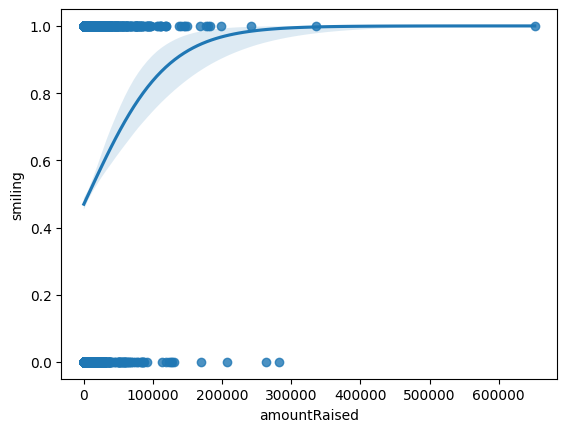

time: 7.83 s (started: 2025-11-10 10:48:40 +13:00)


In [28]:
import seaborn as sns
sns.regplot(x="amountRaised", y="smiling", data=df, logistic=True)

In [29]:
smf.ols(formula=formula, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_amountRaised   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          2.95e-175
Time:                        10:48:47   Log-Likelihood:                -8747.6
No. Observations:                4455   AIC:                         1.751e+04
Df Residuals:                    4446   BIC:                         1.757e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0209      0.408      2.504      0.012       0.222       1.820
smiling[T.True]     0.6074      0.054     11.227      0.000       0.501       0.714
gender[T.male]      0.2096      0.055      3.816      0.000       0.102       0.317
gender[T.other]    -0.2730      0.113     -2.425      0.015      -0.494      -0.052
days                0.0012      0.000      6.179      0.000       0.001       0.002
sentiment           0.0170      0.002     10.887      0.000       0.014       0.020
truth               0.0207      0.005      4.268      0.000       0.011       0.030
urgency             0.0384      0.002     18.980      0.000       0.034       0.042
parsed_age         -0.0014      0.001     -1.016      0.309      -0.004       0.001
==============================================================================
Omnibus:                       83.437   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.082
Skew:                          -0.275   Prob(JB):                     3.05e-22
Kurtosis:                       3.480   Cond. No.                     3.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

time: 90.4 ms (started: 2025-11-10 10:48:47 +13:00)


In [30]:
model = RandomForestRegressor()
cols = "sentiment + smiling + gender + truth + urgency + ethnicity".split(" + ")
X = pd.get_dummies(df[cols])
y = df["met_target"]
model.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


time: 797 ms (started: 2025-11-10 10:48:48 +13:00)


In [31]:
list(zip(cols, model.feature_importances_))

[('sentiment', np.float64(0.21714220780964652)),
 ('smiling', np.float64(0.09765563879988882)),
 ('gender', np.float64(0.12161975328506257)),
 ('truth', np.float64(0.1969747348218822)),
 ('urgency', np.float64(0.04706132967039141)),
 ('ethnicity', np.float64(0.04718095039393153))]

time: 10.5 ms (started: 2025-11-10 10:48:48 +13:00)


In [32]:
df.region.value_counts().head(20)

region
Auckland                 1437
Canterbury                587
Wellington                512
Waikato                   413
Bay of Plenty             311
Nationwide                204
Otago                     180
Northland                 167
Hawke's Bay               137
indeterminate/unknown     122
Manuwatū-Whanganui        116
Taranaki                  105
Manawatū-Whanganui         96
Nelson                     90
Southland                  75
International              54
Marlborough                42
Gisborne                   36
West Coast                 25
Tasman                     18
Name: count, dtype: int64

time: 4.66 ms (started: 2025-11-10 10:48:48 +13:00)
